# Optimization algorithms for compressed sensing

# Table of contents
1. [Preliminaries](#part1)
1. [A greed algorithm: orthogonal matching pursuit](#part2)
1. [Basis pursuit](#part3)
1. [A regularized problem: proximal methods](#part4)
1. [The exact problem: Douglas-Rachford method](#part5)
1. [Another sparsity prior](#part6)


In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

%load_ext autoreload
%autoreload 2

# Load nt_toolbox
import sys
sys.path.append('../tp1/')
from nt_toolbox.compressed_sensing import get_measurements, plot_image, minL2

# Preliminaries <a id="part1"></a>
>Let us focus on the compressed sensing problem: finding a sparse vector $x \in \mathbb R^d$ such that $y = Ax$, where the vector of measurements $y$ and the sensing matrix $A$ are given.
For this purpose, we will assess different strategies:
>- a greedy approach: orthogonal matching pursuit;
>- solving basis pursuit with an interior point method (scipy.optimize.linprog);
>- solving a regularized problem: $\operatorname{minimize}_{x \in \mathbb R ^d} \|x\|_1 + \frac{\mu}{2} \|Ax - y\|_2^2$, with proximal methods;
>- solving basis pursuit with Douglas-Rachford method;
>- introducing a new (total variation) regularization in order to improve reconstruction.
>
>In this practical session, we are provided with a measurement function, that returns three components.
The first two are of interest for now.

In [2]:
help(get_measurements)
y, A, T = get_measurements()

Help on function get_measurements in module nt_toolbox.compressed_sensing:

get_measurements(n=32, r_sparse=0.2, r_info=0.5)
    Measurement function.
    
    Parameters:
    - n is the image size (n x n);
    - r_sparse is the ratio of non-zero coefficients (wavelet domain) of the
    signal x to recover;
    - r_info is the ratio between the size of y and the size of x.
    
    Return y, A, T, where:
    - y is the vector of measurements;
    - A is the sensing matrix (we look for x such that y = Ax);
    - T is a total variation operator.



In [3]:
n = int(np.sqrt(A.shape[1]))
p = A.shape[0]

print(f"Image size: {n}x{n}.")
print(f"Measurement vector size: {p}")
print(f"Sensing matrix size: {A.shape[0]}x{A.shape[1]}")

Image size: 32x32.
Measurement vector size: 512
Sensing matrix size: 512x1024


>To get a first idea of the image to recover, we propose to solve the following projection problem:
$$
    \operatorname{minimize}_{x \in \mathbb R ^d}~
    \|Ax - y\|_2.
$$
Obviously, the resulting image is not a faithful approximation of the one to recover.

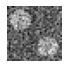

In [4]:
# L2 projection
x2 = minL2(y, A)

plot_image(x2)

# A greed algorithm: orthogonal matching pursuit <a id="part2"></a>
>In this section, we aim at providing a a feasible point to the problem
$$
    \begin{array}{cl}
        \displaystyle{ \operatorname{minimize}_{x \in \mathbb R ^d} }
        & \displaystyle{ \|Ax - y\|_2 } \\
        \operatorname{st}
        & \displaystyle{ \|x\|_0 \le s }
    \end{array}
$$
with orthogonal matching pursuit.
>
>**Question 1.**
Define a function `omp(y, A, s=None, eps=None)`, that implements orthogonal matching pursuit and that:
>- returns an $s$-sparse approximation of x;
>- returns the sequence $(\|Ax_k-y\|_2)_k$;
>- terminates when $x_k$ is $s$-parse or when $\|Ax_k-y\|_2 \le \epsilon$ ($\epsilon > 0$ given).
>
>You can use a set object for the set of indexes: `index = set()`, `index.add(a_new_index)`, `A[:, list(index)]` for the columns of interest.
>
>Plot the approximation error and the solution provided by orthogonal matching pursuit.

In [ ]:
# Answer

# Basis pursuit <a id="part3"></a>
>We aim here at solving the basis pursuit problem:
$$
    \begin{array}{cl}
        \displaystyle{ \operatorname{minimize}_{z \in \mathbb R ^{2d}} }
        & \displaystyle{ \sum_{i=1}^{2d} z_i } \\
        \operatorname{st}
        & \left\{ \begin{array}{l}
            \displaystyle{ [A; -A]z = y } \\
            \displaystyle{ z_i \ge 0, \forall i \in [2d] }
        \end{array} \right.
    \end{array}
$$
with an off-the-shelf simplex method (scipy.optimize.linprog).
>
>**Question 1.**
Read the documentation of `linprog` and use it to solve basis pursuit.
For this purpose, you can define a function `basispursuit(y, A)` returning a solution $z$ to the previous problem.
What can you conclude?

In [ ]:
# Answer

>**Question 2.**
To go furher, we propose to use a barrier method for large scale optimization.
For this purpose, install `cxvopt` and use [cvxopt.solvers.lp](https://cvxopt.org/userguide/coneprog.html#linear-programming).
You can define a function `barrier(y, A)` returning a solution $z$ to the previous problem.

In [ ]:
# Answer

# A regularized problem: proximal methods <a id="part4"></a>
>In this section, we decide to approximate the linear constraint with a regularization.
Therefore, we aim at solving:
$$
    \operatorname{minimize}_{x \in \mathbb R ^d}
    \|x\|_1 + \frac{\mu}{2} \|Ax - y\|_2^2,
$$
where $\mu > 0$.
>
>**Question 1.**
Show that:
$$
    [\operatorname{prox}_{\gamma \|\cdot\|_1} (x) ]_i = \max \left(0, 1- \frac{\gamma}{|x_i|} \right) x_i.
$$
>
>Implement this function with signature `proxL1(x, gamma)`.

**Answer:**
…

In [ ]:
# Answer

>**Question 2.**
Define a function `ista(y, A, mu=1., n_it=100)`, that:
>- performs a proximal gradient descent with fixed step size;
>- terminates after n_it iterations;
>- returns an approximate solution $x$ and the sequence of objective values $(\|x_k\|_1 + \frac{\mu}{2} \|Ax_k - y\|_2^2)_k$.
>
>Run this function to recover the original image.
Plot the image, the objective function and compute the error $\|Ax - y\|_2$.

In [ ]:
# Answer

>**Question 3.**
Do the same with an accelerated proximal method.
The function can be called `fista`.

In [ ]:
# Answer

>**Question 4.**
Compare the behavior of the objective function for ISTA and FISTA.
Compare with theoretical convergence bounds.

In [ ]:
# Answer

# The exact problem: Douglas-Rachford method <a id="part5"></a>
>Conversely to the approximation in the previous section, we aim now at solving the original problem involved in compressed sensing:
$$
    \operatorname{minimize}_{x \in \mathbb R ^d}
    \|x\|_1 + \chi_{\mathcal A}(x),
$$
where $\mathcal A = \{x \in \mathbb R^d : Ax = y\}$.
>
>**Question 1.**
Show that $\operatorname{prox}_{\chi_{\mathcal A}}(x) = (I - A^\top(AA^\top)^{-1}A)x + A^\top(AA^\top)^{-1}y$.

**Answer:**
…

>**Question 2.**
Define a function `DRmethod(y, A, n_it=100, version=1)` that implements the Douglas-Rachford method with $f = \|\cdot\|_1$ and $g = \chi_{\mathcal A}$ (first version), and conversely with $f = \chi_{\mathcal A}$ and $g = \|\cdot\|_1$ (second version).
This function has to return an approximate solution and the sequence $(\|x_k\|_1)_k$.
>
>Compare both versions based on the recovered image, the behavior of the objective value and the error $\|Ax - y\|_2$.
Which one is preferable?

In [ ]:
# Answer

# Another sparsity prior <a id="part6"></a>
>In order to improve image reconstruction, we propose to regularize with a total variation operator $T$.
The problem to minimize becomes:
$$
    \operatorname{minimize}_{x \in \mathbb R ^d}~
    \|Tx\|_1 + \frac{\mu}{2} \|Ax-y\|_2^2.
$$
>
>This problem can be rewritten in:
$$
    \begin{array}{cl}
        \displaystyle{ \operatorname{minimize}_{z, x} }
        & \displaystyle{ \|z\|_1 + \frac{\mu}{2} \|Ax-y\|_2^2 } \\
        \operatorname{st}
        & \displaystyle{ Tx = z. }
    \end{array}
$$
>
>We aim at solving this problem with ADMM.
>
>**Question 1.**
Show that minimizing the augmented Lagrangian with respect to $z$ boils down to:
$$
    z_{k+1} = \operatorname{prox}_{\frac 1 \gamma \|\cdot\|_1}(Tx_k + \frac 1 \gamma \nu_k).
$$

**Answer:**
…

>**Question 2.**
Show that minimizing the augmented Lagrangian with respect to $x$ boils down to:
$$
    x_{k+1} = (\mu A^\top A + \gamma T^\top T)^{-1}(\mu A^\top y + T^\top(\gamma z_{k+1} - \nu_k)).
$$

**Answer:**
…

>**Question 3.**
Define a function `ADMM(y, A, T, mu=1., n_it=100, gamma=1.)` for solving the problem.
This function has to return an approximate solution and the sequence of objective values.
>
>Is the result different from solutions obtained with proximal methods?

In [ ]:
# Answer